# This file is for imbalance task

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import pickle

from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn import preprocessing, svm
from sklearn import neighbors
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas_ml import ConfusionMatrix
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

In [20]:
# Load the preprocessed file to save the time
dataset = pd.read_pickle("dataset_preprocessing_1.pickle")
dataset_1 = dataset
dataset_2 = dataset_1[['amount']]
dataset_1.drop(['amount'],axis =1,inplace=True)

# Drop some unimportant feature
dataset_dummies = dataset_1[['txvariantcode','cvcresponsecode','cardverificationcodesupplied']]
dataset_dummies = pd.get_dummies(dataset_dummies)
dataset_1.drop(['txvariantcode','cvcresponsecode','cardverificationcodesupplied'],axis = 1,inplace = True)
dataset_1 = dataset_1.apply(lambda x: x.factorize()[0])
factorize_all_1 = pd.concat([dataset_1,dataset_dummies,dataset_2],axis =1)
factorize_all_1.drop(['creationdate','bookingdate','mail_id','ip_id','card_id'],axis = 1,inplace = True)

In [21]:
X_fraud = factorize_all_1.loc[dataset['simple_journal']=='Chargeback']
X_nonfraud = factorize_all_1.loc[dataset['simple_journal']!='Chargeback']

##shuffle the data and split(fraud)
X_fraud = X_fraud.sample(frac = 1).reset_index(drop=True)

##shuffle the data and split(non-fraud)
X_nonfraud = X_nonfraud.sample(frac = 1).reset_index(drop=True)


# ROC Curve

In [22]:
##SMOTE##


##shuffle the data and split(fraud)
X_fraud = X_fraud.sample(frac = 1).reset_index(drop=True)
X_train,X_test = X_fraud[:-35],X_fraud[-35:]


##shuffle the data and split(non-fraud)
X_nonfraud = X_nonfraud.sample(frac = 1).reset_index(drop=True)
X_train_non,X_test_non = X_nonfraud[:-29004],X_nonfraud[-29004:]

Test = [X_test,X_test_non]
Test = pd.concat(Test)
Test_y = Test['simple_journal']
Test_X = Test.drop(['simple_journal'],axis = 1)
Test_y_np = np.array(Test_y)
Test_X_np = np.array(Test_X)

Train_SMOTE = [X_train,X_train_non]
Train_SMOTE = pd.concat(Train_SMOTE)
Train_y = Train_SMOTE['simple_journal']
Train_X = Train_SMOTE.drop(['simple_journal'],axis =1)

#### SMOTE ###
Train_X_resample, Train_y_resample = SMOTE(k_neighbors = 200).fit_sample(Train_X, Train_y)

#### np.array ###
Train_X_np = np.array(Train_X)
Train_y_np = np.array(Train_y)

Train_X_np_smote = np.array(Train_X_resample)
Train_y_np_smote = np.array(Train_y_resample)

## Random Forest ROC

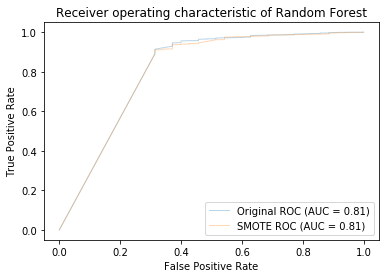

In [23]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

classifier = RandomForestClassifier(n_estimators=10)  # Random forest

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# for non-smote data
#for train, test in enumerate(cv):
probas_ = classifier.fit(Train_X_np, Train_y_np).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='Original ROC (AUC = %0.2f)' % (roc_auc))

# for smote data
probas_ = classifier.fit(Train_X_np_smote , Train_y_np_smote).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='SMOTE ROC (AUC = %0.2f)' % (roc_auc))


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Random Forest')
plt.legend(loc="lower right")
plt.show()

## knn ROC

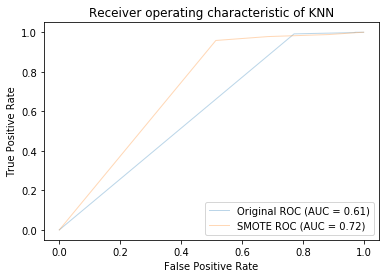

In [24]:
classifier =  neighbors.KNeighborsClassifier(algorithm = 'kd_tree') # knn

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# for non-smote data
#for train, test in enumerate(cv):
probas_ = classifier.fit(Train_X_np, Train_y_np).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='Original ROC (AUC = %0.2f)' % (roc_auc))

# for smote data
probas_ = classifier.fit(Train_X_np_smote , Train_y_np_smote).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='SMOTE ROC (AUC = %0.2f)' % (roc_auc))


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of KNN')
plt.legend(loc="lower right")
plt.show()

##  LogisticRegression ROC

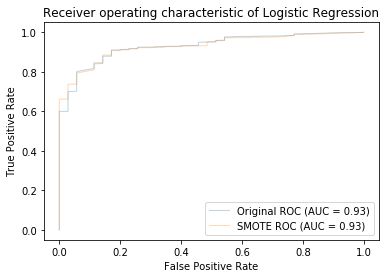

In [25]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# for non-smote data
#for train, test in enumerate(cv):
probas_ = classifier.fit(Train_X_np, Train_y_np).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='Original ROC (AUC = %0.2f)' % (roc_auc))

# for smote data
probas_ = classifier.fit(Train_X_np_smote , Train_y_np_smote).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='SMOTE ROC (AUC = %0.2f)' % (roc_auc))


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

## multi-layer perceptron ROC

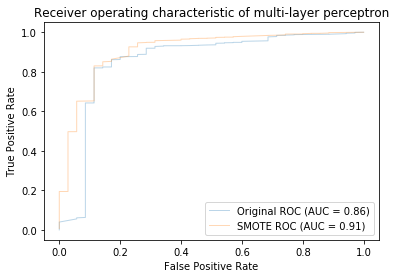

In [26]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()  
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# for non-smote data
#for train, test in enumerate(cv):
probas_ = classifier.fit(Train_X_np, Train_y_np).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='Original ROC (AUC = %0.2f)' % (roc_auc))

# for smote data
probas_ = classifier.fit(Train_X_np_smote , Train_y_np_smote).predict_proba(Test_X_np)
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(Test_y_np, probas_[:, 1])
tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
plt.plot(fpr, tpr, lw=1, alpha=0.3,
         label='SMOTE ROC (AUC = %0.2f)' % (roc_auc))


plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of multi-layer perceptron')
plt.legend(loc="lower right")
plt.show()